# Xarray
http://xarray.pydata.org/en/stable/index.html

>xarray (formerly xray) is an open source project and Python package that makes working with labelled **multi->dimensional arrays simple, efficient, and fun**!
>
>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.
>
>Xarray is **inspired by and borrows heavily from pandas**, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with **netCDF files**, which were the source of xarray’s data model, and integrates tightly with **dask for parallel computing**.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Load an example dataset

In [2]:
# ds: Dataset
ds = xr.tutorial.open_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [7]:
ds.attrs

{'Conventions': 'COARDS',
 'title': '4x daily NMC reanalysis (1948)',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'}

In [8]:
ds.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [9]:
ds.time.encoding

{'source': '/home/lalandmi/.cache/xarray_tutorial_data/69c68be1605878a6c8efdd34d85b4ca1-air_temperature.nc',
 'original_shape': (2920,),
 'dtype': dtype('float32'),
 'units': 'hours since 1800-01-01',
 'calendar': 'standard'}

In [11]:
!ncdump -h /home/lalandmi/.cache/xarray_tutorial_data/69c68be1605878a6c8efdd34d85b4ca1-air_temperature.nc

netcdf \69c68be1605878a6c8efdd34d85b4ca1-air_temperature {
dimensions:
	lat = 25 ;
	time = 2920 ;
	lon = 53 ;
variables:
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	short air(time, lat, lon) ;
		air:long_name = "4xDaily Air temperature at sigma level 995" ;
		air:units = "degK" ;
		air:precision = 2s ;
		air:GRIB_id = 11s ;
		air:GRIB_name = "TMP" ;
		air:var_desc = "Air temperature" ;
		air:dataset = "NMC Reanalysis" ;
		air:level_desc = "Surface" ;
		air:statistic = "Individual Obs" ;
		air:parent_stat = "Other" ;
		air:actual_range = 185.16f, 322.1f ;
		air:scale_factor = 0.01 ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time" ;
		time:units = "hours since 1800-01-01" ;
		time:calendar = "standard" ;

// global attributes:
		:Conv

In [12]:
ds.sel(time=slice('2014-01', '2014-12'))

<xarray.Dataset>
Dimensions:  (lat: 25, time: 1460, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2014-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Get air temperature

In [4]:
# da: DataArray
da = ds.air # Same as ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Convert to °C

In [5]:
# Convert to °C
da = xr.tutorial.open_dataset('air_temperature').air
da -= 273.15
da.attrs['units'] = '°C'
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[-31.949997, -30.649994, -29.649994, ..., -40.350006,
         -37.649994, -34.550003],
        [-29.350006, -28.649994, -28.449997, ..., -40.350006,
         -37.850006, -33.850006],
        [-23.149994, -23.350006, -24.259995, ..., -39.949997,
         -36.759995, -31.449997],
        ...,
        [ 23.450012,  23.049988,  23.25    , ...,  22.25    ,
          21.950012,  21.549988],
        [ 22.75    ,  23.049988,  23.640015, ...,  22.75    ,
          22.75    ,  22.049988],
        [ 23.140015,  23.640015,  23.950012, ...,  23.75    ,
          23.640015,  23.450012]],

       [[-31.050003, -30.449997, -30.050003, ..., -41.149994,
         -39.550003, -37.350006],
        [-29.550003, -29.050003, -28.949997, ..., -42.149994,
         -40.649994, -37.449997],
        [-19.949997, -20.259995, -21.050003, ..., -42.350006,
         -39.759995, -34.649994],
...
        [ 20.540009,  20.73999 ,  22.23999 , ...,  21.940002,
          21.540009,  21.140015],
        [ 23.140015,  24.040009,  24.440002, ...,  22.140015,
          21.940002,  21.23999 ],
        [ 24.640015,  25.23999 ,  25.339996, ...,  22.540009,
          22.339996,  22.040009]],

       [[-28.059998, -28.86    , -29.86    , ..., -31.460007,
         -31.660004, -31.36    ],
        [-23.259995, -23.86    , -24.759995, ..., -33.559998,
         -32.86    , -31.460007],
        [-10.160004, -10.959991, -11.76001 , ..., -33.259995,
         -30.559998, -26.86    ],
        ...,
        [ 20.640015,  20.540009,  21.940002, ...,  22.140015,
          21.940002,  21.540009],
        [ 22.940002,  23.73999 ,  24.040009, ...,  22.540009,
          22.540009,  22.040009],
        [ 24.540009,  24.940002,  24.940002, ...,  23.339996,
          23.040009,  22.540009]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         °C
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
# Be aware that if you use 'da = da - 273.15' it won't keep attributes
# so you can use 'xr.set_options(keep_attrs=True)''
da = xr.tutorial.open_dataset('air_temperature').air
with xr.set_options(keep_attrs=True):
    da = da - 273.15
da.attrs['units'] = '°C'
da

### Plot

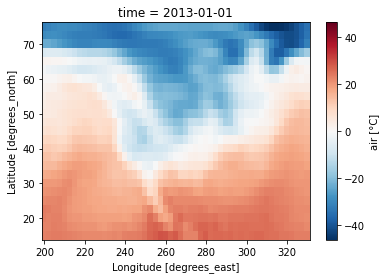

In [27]:
da.isel(time=0).plot() # or da[0].plot()

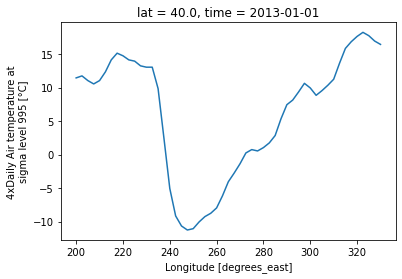

In [38]:
da[0].sel(lat=40).plot()

### Make mask

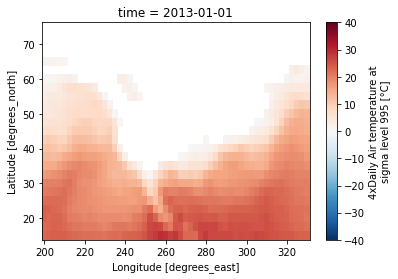

In [44]:
da[0].where(da[0] > 0).plot(vmin=-40, vmax=40, cmap='RdBu_r')

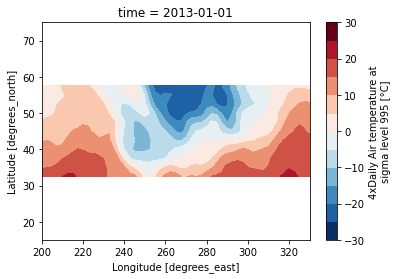

In [52]:
da[0].where( (da.lat > 30) & (da.lat < 60) ).plot.contourf(levels=np.arange(-30, 35, 5))

## Resample / groupby

In [53]:
da.time.values

array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ...,
       '2014-12-31T06:00:00.000000000', '2014-12-31T12:00:00.000000000',
       '2014-12-31T18:00:00.000000000'], dtype='datetime64[ns]')

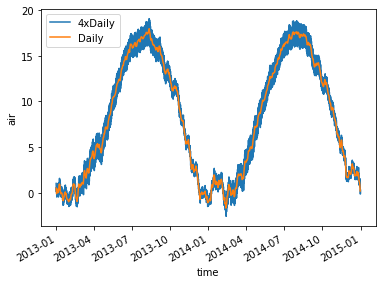

In [63]:
# Be aware that the spatial average here on lat/lon is not right (see later)
da.mean(('lat', 'lon')).plot(label='4xDaily')
da.resample(time='D').mean('time').mean(('lat', 'lon')).plot(label='Daily')
plt.legend()

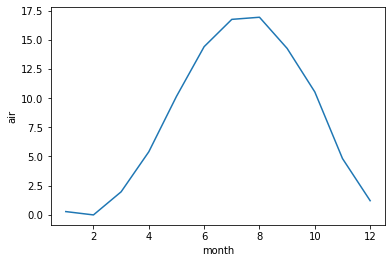

In [69]:
da.groupby('time.month').mean('time').mean(('lat', 'lon')).plot()

In [55]:
da.max() # da.std(), etc.

<xarray.DataArray 'air' ()>
array(44.25, dtype=float32)

## Compute climatology

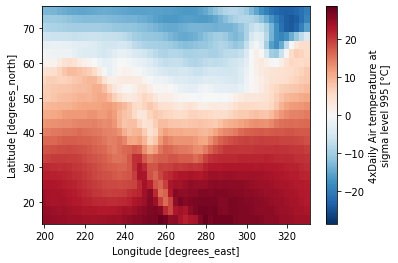

In [71]:
# da.mean('time', keep_attrs=True, skipna=False)
da.mean('time', keep_attrs=True).plot()

In [72]:
da.groupby('time.season')

DataArrayGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

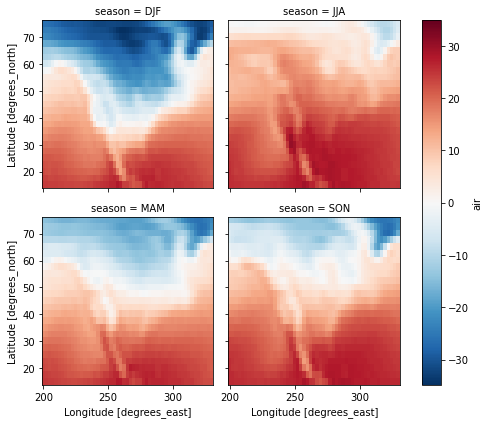

In [77]:
da.groupby('time.season').mean('time').plot(col='season', col_wrap=2)

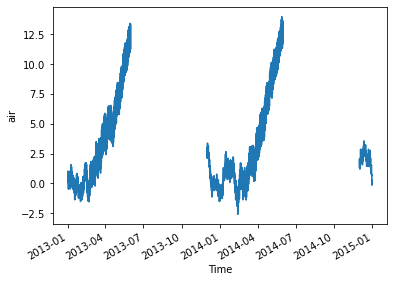

In [80]:
# Custom seasons
da.where( (da['time.month'] >= 12) | (da['time.month'] <= 5)).mean(('lat', 'lon')).plot()

## Spatial average
https://pangeo.io/use_cases/physical-oceanography/sea-surface-height.html

With new version: http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html

### By hand

In [33]:
def spatial_average(da):
    coslat = np.cos(np.deg2rad(da.lat)).where(~da.isnull())
    weights = coslat / coslat.sum(dim=('lat', 'lon'))
    return (da * weights).sum(dim=('lat','lon'))

Text(0.5, 1.0, 'Compare weighted and unweighted mean temperature')

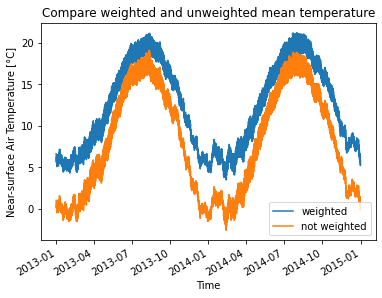

In [89]:
spatial_average(da).plot(label='weighted')
da.mean(('lat', 'lon')).plot(label='not weighted')
plt.legend()
plt.ylabel('Near-surface Air Temperature [°C]')
plt.title('Compare weighted and unweighted mean temperature')

### Weighted function

In [90]:
weights = np.cos(np.deg2rad(da.lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 25)>
array([0.25881907, 0.30070582, 0.34202015, 0.38268346, 0.42261827,
       0.4617486 , 0.49999997, 0.5372996 , 0.57357645, 0.6087614 ,
       0.6427876 , 0.67559016, 0.70710677, 0.7372773 , 0.76604444,
       0.7933533 , 0.81915206, 0.8433914 , 0.8660254 , 0.8870108 ,
       0.90630776, 0.9238795 , 0.9396926 , 0.95371693, 0.9659258 ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [92]:
da_weighted = da.weighted(weights)
da_weighted.mean(("lon", "lat"))

<xarray.DataArray 'air' (time: 2920)>
array([6.6161737, 5.9668636, 5.603581 , ..., 5.204087 , 5.218902 ,
       5.76014  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

Text(0.5, 1.0, 'Compare weighted and unweighted mean temperature')

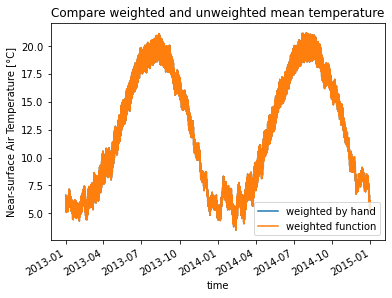

In [94]:
spatial_average(da).plot(label='weighted by hand')
da_weighted.mean(('lat', 'lon')).plot(label='weighted function')
plt.legend()
plt.ylabel('Near-surface Air Temperature [°C]')
plt.title('Compare weighted and unweighted mean temperature')

## Make projected plots 

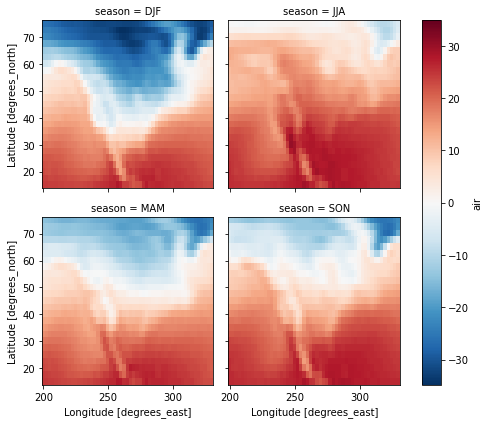

In [6]:
da_seas = da.groupby('time.season').mean('time')
da_seas.plot(col='season', col_wrap=2)

### xarray / cartopy

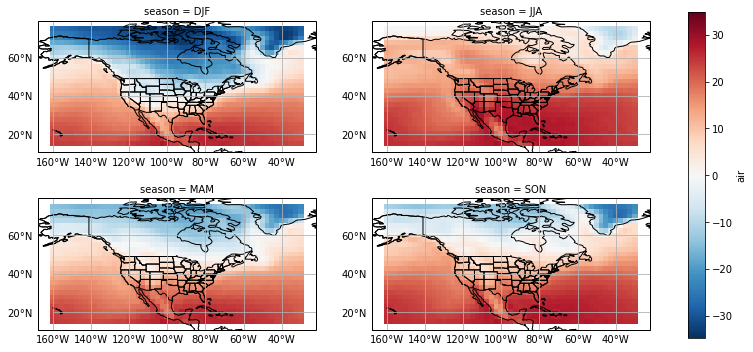

In [118]:
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# This is the map projection we want to plot *onto*
# map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
map_proj = ccrs.PlateCarree(central_longitude=-95)

p = da_seas.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    col="season",
    col_wrap=2,  # multiplot settings
    aspect=ds.dims["lon"] / ds.dims["lat"],  # for a sensible figsize
    subplot_kws={"projection": map_proj},
)  # the plot's projection

# We have to set the map's options on all axes
for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cfeature.STATES) 
#     ax.set_extent([-160, -30, 5, 75])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlocator = mticker.FixedLocator(np.arange(-160, -10, 20))
    gl.ylocator = mticker.FixedLocator(np.arange(0, 90, 20))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top, gl.ylabels_right = False, False

### Proplot
https://proplot.readthedocs.io/en/v0.6.4/

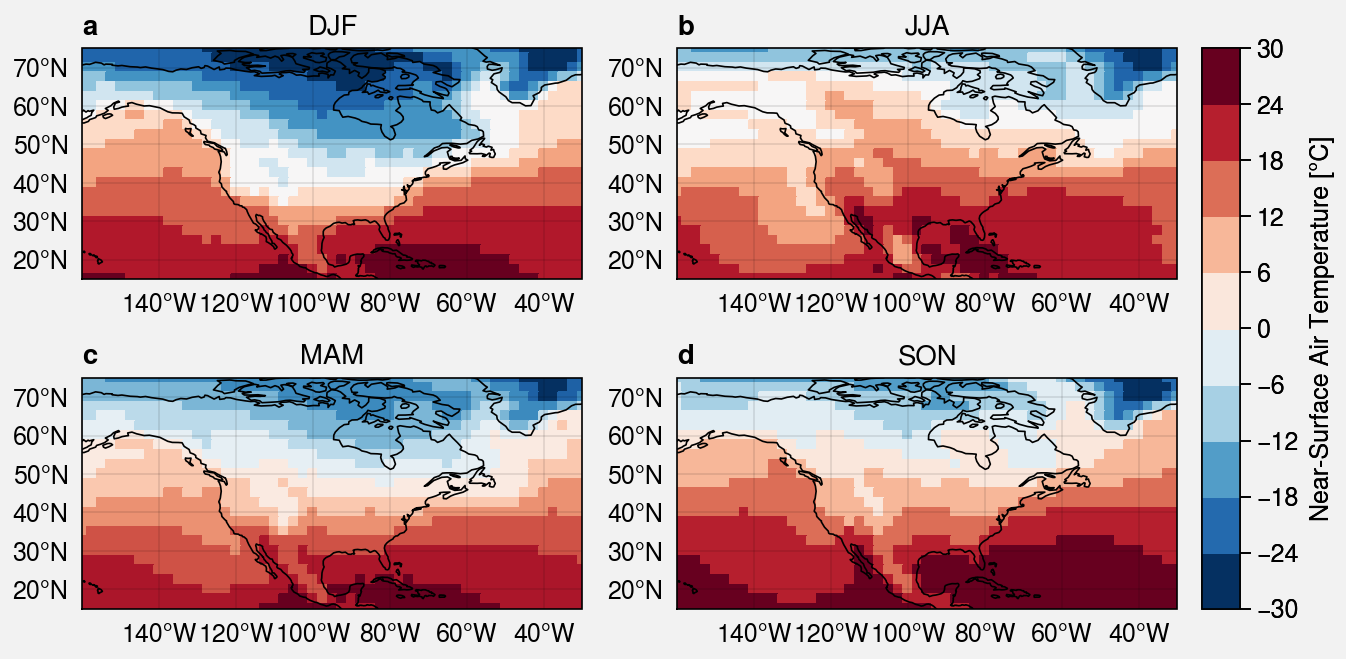

In [30]:
import proplot as plot #pplt in new versions

fig, axs = plot.subplots(nrows=2, ncols=2, proj='cyl')

for i, ax in enumerate(axs):
    m = ax.pcolormesh(da_seas[i], cmap='RdBu_r')
    ax.format(title=da_seas.season[i].values.item(0))

axs.format(
    labels=True, coast=True,
    latlim=(da.lat.min(), da.lat.max()), 
    lonlim=(da.lon.min(), da.lon.max()),
    abc=True
)

fig.colorbar(m, label='Near-Surface Air Temperature [°C]')

## Check versions

### xarray
Check `xarray` versions  
http://xarray.pydata.org/en/stable/index.html

In [3]:
# Check xarray versions
xr.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]
python-bits: 64
OS: Linux
OS-release: 4.19.0-18-amd64
machine: x86_64
processor: 
byteorder: little
LC_ALL: None
LANG: fr_FR.UTF-8
LOCALE: fr_FR.UTF-8
libhdf5: 1.10.6
libnetcdf: 4.7.4

xarray: 0.16.0
pandas: 1.1.0
numpy: 1.19.1
scipy: 1.5.2
netCDF4: 1.5.4
pydap: None
h5netcdf: None
h5py: None
Nio: None
zarr: 2.4.0
cftime: 1.2.1
nc_time_axis: 1.2.0
PseudoNetCDF: None
rasterio: 1.1.5
cfgrib: 0.9.8.5
iris: None
bottleneck: None
dask: 2.21.0
distributed: 2.21.0
matplotlib: 3.2.0
cartopy: 0.17.0
seaborn: 0.11.2
numbagg: None
pint: None
setuptools: 49.2.0.post20200712
pip: 20.2
conda: None
pytest: 6.0.0
IPython: 7.16.1
sphinx: None


/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


### proplot

Check `proplot` version. Be aware that this package evolves fast, so the version used in this notebook is not the latest version and some keywords have already changed. So check the documentation with the right version: https://proplot.readthedocs.io/en/v0.6.4/

In [5]:
plot.version

'0.6.4'